Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.

In [2]:
data = pd.read_excel(r'D:\ICT kerala\week11_supervised\iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.

## Handling missing values

In [8]:
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data['SL'].count()*100).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys = ['total_missing','percent'])
missing_df

,total_missing,percent
SL,7,4.895105
SW,6,4.195804
PL,6,4.195804
PW,0,0.000000
Classification,0,0.000000


Before filling in the missing values we have to check the skewness and outliers of the variables

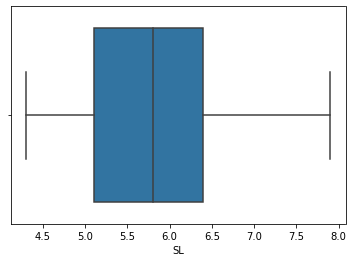

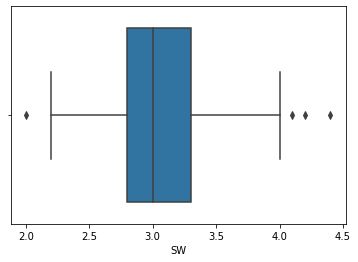

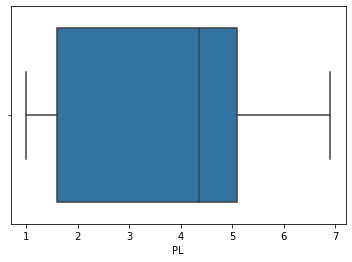

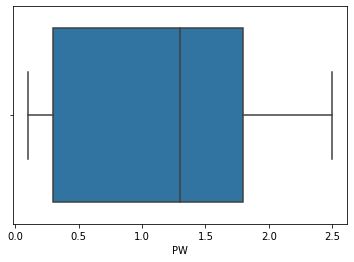

In [9]:
l = data.select_dtypes(include='float')
for x in l:
    sns.boxplot(data[x])
    plt.show()

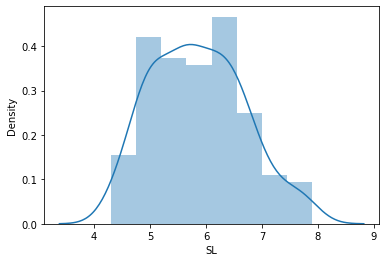

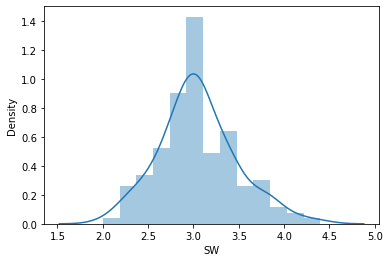

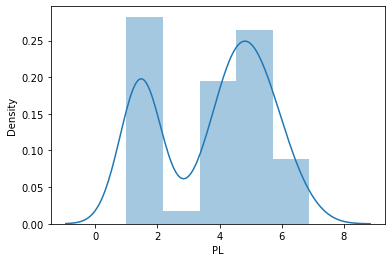

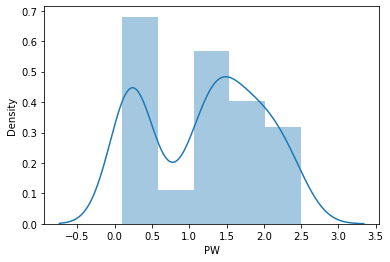

In [10]:
for x in l:
    sns.distplot(data[x])
    plt.show()

We can fillin the missing values using median 

In [11]:
data.fillna(value=data.median(), inplace=True)

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now there are no missing values left in the dataset.

## Handling outliers

In [15]:
q1_sl, q3_sl = data['SL'].quantile([.25, .75])
iqr_sl = q3_sl-q1_sl
uplim_sl = q3_sl + (iqr_sl*1.5)
lowlim_sl = q1_sl - (iqr_sl*1.5)

outs = []
for x in data['SL']:
    if ((x>uplim_sl) or (x<lowlim_sl)):
        outs.append(x)
outs

[]

There are no outliers in SL variable

In [16]:
q1_sw, q3_sw = data['SW'].quantile([.25, .75])
iqr_sw = q3_sw-q1_sw
uplim_sw = q3_sw + (iqr_sw*1.5)
lowlim_sw = q1_sw - (iqr_sw*1.5)

outs = []
for x in data['SW']:
    if ((x>uplim_sw) or (x<lowlim_sw)):
        outs.append(x)
outs

[4.0, 4.4, 4.1, 4.2, 2.0]

These outliers can be replaced by percentiles

In [17]:
p10_sw, p90_sw = np.percentile(data['SW'],[10,90])

for x in data['SW']:
    if x>p90_sw:
        data['SW'].replace(x, p90_sw, inplace=True)
    elif x<p10_sw:
        data['SW'].replace(x, p10_sw, inplace=True)

In [18]:
out = []
for x in data['SW']:
    if ((x>uplim_sw) or (x<lowlim_sw)):
        out.append(x)
out

[]

The outliers are successfully replaced

In [19]:
q1_pw, q3_pw = data['PW'].quantile([.25, .75])
iqr_pw = q3_pw-q1_pw
uplim_pw = q3_pw + (iqr_pw*1.5)
lowlim_pw = q1_pw - (iqr_pw*1.5)

outs = []
for x in data['PW']:
    if ((x>uplim_pw) or (x<lowlim_pw)):
        outs.append(x)
outs

[]

There are no outliers in the variable PW

In [20]:
q1_pl, q3_pl = data['PL'].quantile([.25, .75])
iqr_pl = q3_pl-q1_pl
uplim_pl = q3_pl + (iqr_pl*1.5)
lowlim_pl = q1_pl - (iqr_pl*1.5)

outs = []
for x in data['PL']:
    if ((x>uplim_pl) or (x<lowlim_pl)):
        outs.append(x)
outs

[]

There are no outliers in the variable PL

In [21]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Taking the variable Classification as the target variable. 

We have to aplly one hot encoding in it.

## One Hot Encoding

In [22]:
data['Classification'] = pd.get_dummies(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,5.8,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# 3. Find out which classification model gives the best result to predict iris      species.(also do random forest algorithm)


Splitting the data into train and test sets

In [23]:
x = data.drop(['Classification'],axis=1)
y = data[['Classification']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

## k-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [25]:
model = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [26]:
print('precision score : ', precision_score(y_test, y_pred))
print('recall_score : ', recall_score(y_test, y_pred))
print('f1 score : ', f1_score(y_test, y_pred))

precision score :  1.0
recall_score :  1.0
f1 score :  1.0


In [27]:
confusion_matrix(y_test, y_pred)

array([[20,  0],
       [ 0, 10]], dtype=int64)

In [28]:
x_train.shape

(120, 4)

In [29]:
d = [5.7,3.2,1.3,0.2]

In [30]:
model.predict([d])

array([1], dtype=uint8)

## Random Forest Algorithm

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('f1 score : ', f1_score(y_test, y_pred))
print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Recall score : ', recall_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred))

f1 score :  1.0
Accuracy score :  1.0
Recall score :  1.0
Precision score :  1.0


The accuracy of the knn model and random forest model are highest(1). Both models are perfect fit for the data.